
# Introduction to Deep Learning 
**Deep learning :** is a branch of machine learning which is completely based on artificial neural networks, as neural network is going to mimic the human brain so deep learning is also a kind of mimic of human brain. In deep learning, we don't need to explicitly program everything. The concept of deep learning is not new.

# TensorFlow
<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Workshops/blob/main/Introduction_to_Deep_Learning/Introduction_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. Tensorflow is a symbolic math library based on dataflow and differentiable programming.

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

# Dense
Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

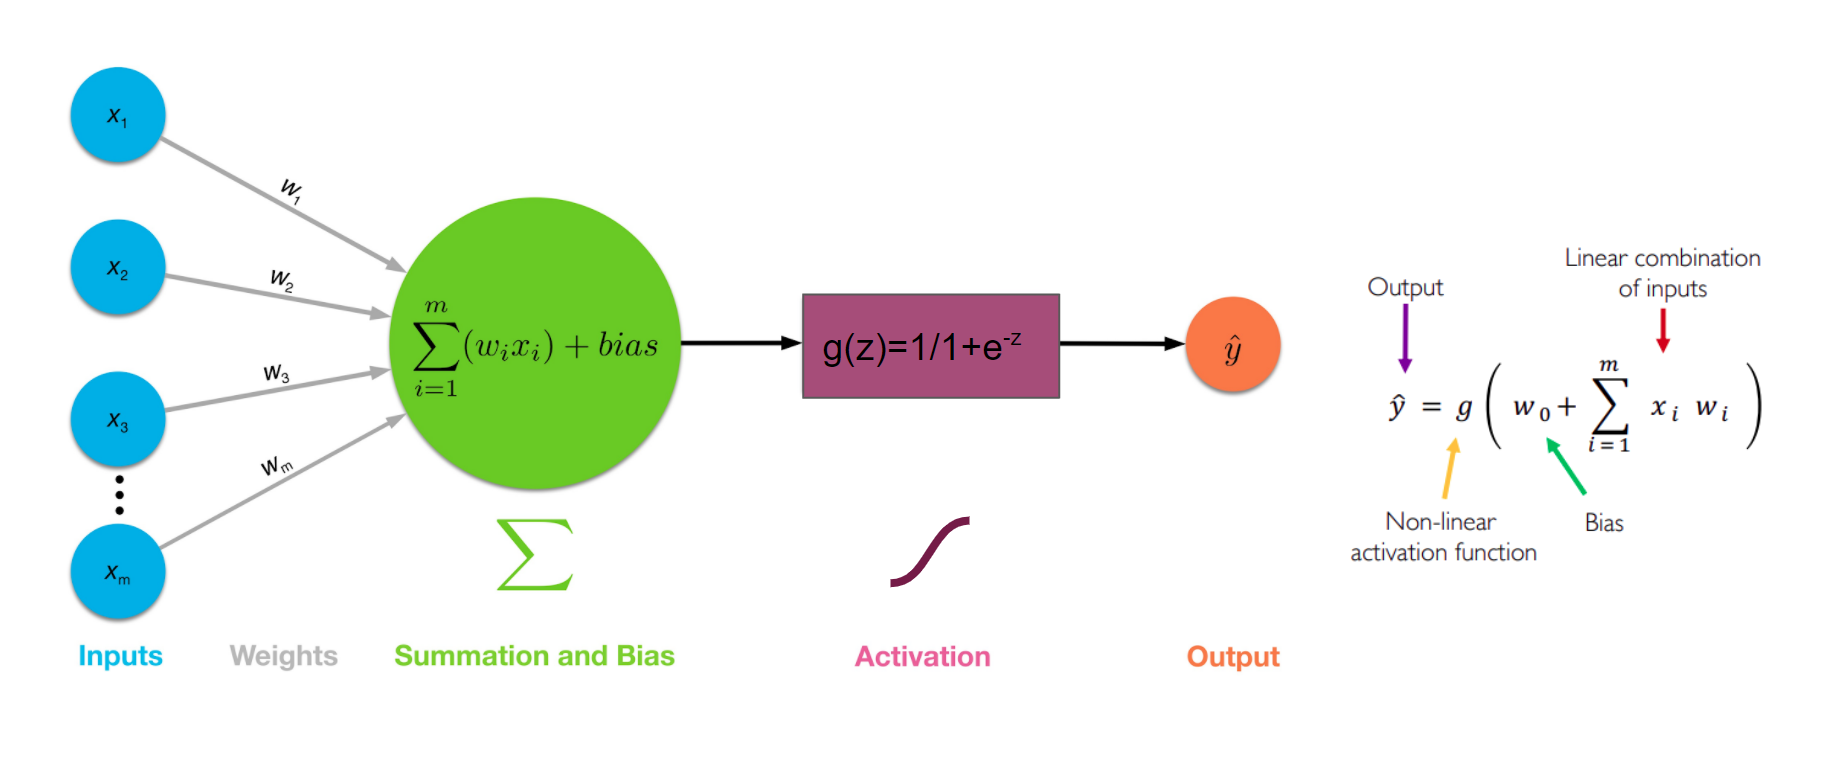

In [ ]:
Dense_layer=tf.keras.layers.Dense(units=32,activation=tf.nn.sigmoid)
Dense_layer(tf.random.normal(shape=[1,12]))

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.58126986, 0.25747785, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.143465  ,
        0.34944576, 0.        , 0.        , 0.        , 0.63824743,
        0.6727959 , 0.58317894, 0.23617743, 0.        , 0.32148117,
        0.        , 0.36023086, 0.        , 0.        , 0.        ,
        0.        , 1.4368871 , 0.07670924, 0.        , 0.        ,
        1.0236145 , 0.        ]], dtype=float32)>

# Sequential
The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

In [ ]:
#creat the Sequential model using keras 
model_1=tf.keras.Sequential([
                             tf.keras.layers.Input(shape=[786]),
                             tf.keras.layers.Dense(units=64,activation=tf.nn.relu,name='layer_1'),
                             tf.keras.layers.Dense(units=128,activation=tf.nn.relu,name='layer_2'),
                            tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid,name='layer_3')

])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 64)                50368     
                                                                 
 layer_2 (Dense)             (None, 128)               8320      
                                                                 
 layer_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,817
Trainable params: 58,817
Non-trainable params: 0
_________________________________________________________________


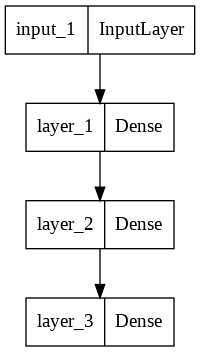

In [ ]:
tf.keras.utils.plot_model(model_1)

In [ ]:
model_1.predict(tf.random.normal(shape=[1,786]))#make a prediction using the predict method

array([[0.5648691]], dtype=float32)

### MNIST Example

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems. This database it built-into TensorFlow, we can load it from the `tf.keras.datasets` module.

This function returns two tuples, one for the training set and one for the testing set. The dataset has 60,000 example for training and 10,000 for testing.

Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:



11493376/11490434 [==============================] - 0s 0us/step
shape of x_train: (60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  8

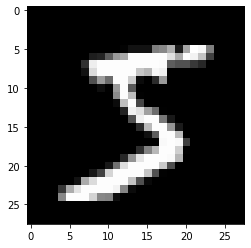

In [ ]:
#load mnist dataset 
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print('shape of x_train:',x_train.shape)
print(x_train[0])
print('the label of x_train[0] is :',y_train[0])
#show an image 
plt.imshow(x_train[0],cmap='gray')

#### One Hot Encoding

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Instead of the target being a singular value (i.e. 3), it becomes a vector that's size is equal to the number of unique targets in the dataset, with all values being 0 except for one which would represent the original singluar value.

In case of having 5 different targets, the one-hot vector will be of length 5, look at the table below to see how the original values are represented as one hot encoded vectors

| Before One Hot Encoding | After One Hot Encoding |
|-------------------------|------------------------|
| 0                       | [1, 0, 0, 0, 0]        |
| 1                       | [0, 1, 0, 0, 0]        |
| 2                       | [0, 0, 1, 0, 0]        |
| 3                       | [0, 0, 0, 1, 0]        |
| 4                       | [0, 0, 0, 0, 1]        |


We can one-hot encode the targets using `tf.one_hot` method, let's do that for the MNIST dataset target

shape of x_train: (60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.

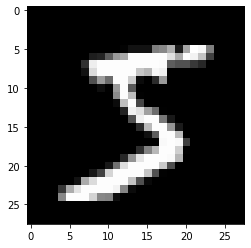

In [ ]:
#reshape the data 
x_train,x_test=x_train.reshape(-1,28*28),x_test.reshape(-1,28*28)
#normalize the pixel values so that each pixel value has a value between 0 and 1.
x_train,x_test=x_train/255,x_test/255
#convert the labels to one-hot vector for y_train and y_test, using one-hot encodeing 
y_train,y_test=tf.one_hot(y_train,10),tf.one_hot(y_test,10)
print('shape of x_train:',x_train.shape)
print(x_train[0])
print('the label of x_train[0] is :',y_train[0],'\n the argmax of y_train[0] :',tf.argmax(y_train[0]))
#show an image 
plt.imshow(x_train[0].reshape(28,28),cmap='gray')

#### `tf.keras.Sequential`
The sequential API allows you to create models by stacking layers on top of eachother, where the output of each layer becomes the input for the following layer.

There are three types of layers, the input layer which should match the number of features or the shape of you training examples, and the output layer which should match the desired output, and hidden layers in between to do the heavy lifting.

Mostly, the output layer can be defined as such:


*   Regression Problems: 1 unit with no activation function `tf.keras.layers.Dense(1)`
*   Binomial Classification Problems: 1 unit with sigmoid activation function `tf.keras.layers.Dense(1, activation='sigmoid')`
*   Multinomial Classification Problems: n units (equal to the number of possible classes/outputs) with softmax activation function `tf.keras.layers.Dense(1, activation='softmax')`




Let's uild the tf.keras.Sequential model by stacking layers.

In [ ]:
#creat a Sequentail model using keras that have input layer with 5 dense layers
model=tf.keras.Sequential([
                           tf.keras.layers.Input(shape=[784]),
                           tf.keras.layers.Dense(units=128,activation=tf.nn.relu,name='layer_1'),# Defining a name for each layer makes debugging easier
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(units=256,activation=tf.nn.relu,name='layer_2'),
                           tf.keras.layers.Dropout(0.3),
                           tf.keras.layers.Dense(units=512,activation=tf.nn.relu,name='layer_3'),
                           tf.keras.layers.Dropout(0.3),
                           tf.keras.layers.Dense(units=256,activation=tf.nn.relu,name='layer_4'),
                           tf.keras.layers.Dropout(0.3),
                           tf.keras.layers.Dense(units=10,activation=tf.nn.softmax,name='output')


])

#show the model info 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 layer_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 layer_3 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 layer_4 (Dense)             (None, 256)              

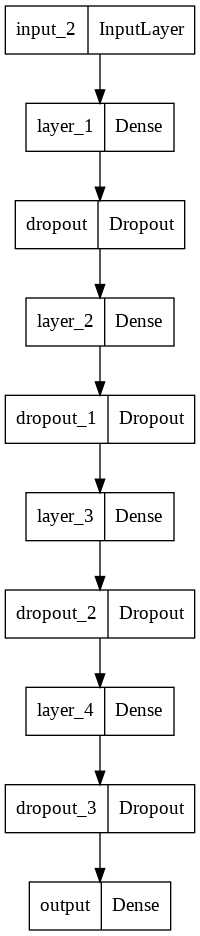

In [ ]:
tf.keras.utils.plot_model(model)

#### Training

Choose an optimizer and loss function for training.

For the optimizer, we will almost always use Adam optimizer because it's been proven to be superior for most deep learning tasks, alternatively we can use other optimizers like SDG and RMSProp. A full list of available optimizers can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers


As for the loss function, it depends on the task, but here are some general rules of thumb that are applicable to most cases: 

*   Regression Problems: `tf.losses.MeanSquaredError()` or `tf.losses.MeanAbsoluteError()`
*   Binomial Classification Problems: `tf.losses.BinaryCrossentropy()`.
*   Multinomial Classification Problems: `tf.losses.CategoricalCrossentropy()`.

A full list of losses can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/losses


As for the metrics, we can use the metrics sutiable for the task at hand, a full list of metrics can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/metrics


In [ ]:
#compile the model an using adam optimizer with Categorical crossentropy cost function
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(), metrics=[tf.metrics.CategoricalAccuracy()])
#train the model with batch_size=32,for 10 epochs 
model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
 947/1688 [===============>..............] - ETA: 5s - loss: 0.7413